分析题干, 快速查看数据结构, 初步可视化, 分析特征

题干: 

赛题背景
1.作为世界第一大清洁能源的太阳能相对煤炭石油等能源来说是可再生、无污染的，只要有太阳就有太阳能，所以太阳能的利用被很多国家列为重点开发项目。但太阳能具有波动性和间歇性的特性，太阳能电站的输出功率受光伏板本体性能、气象条件、运行工况等多种因素影响，具有很强的随机性，由此带来的大规模并网困境严重制约着光伏发电的发展。通过对未来光伏发电功率的短期准确预测并设定调度计划是解决此问题的关键。目前，光伏发电功率预测技术多仅围绕气象条件和历史数据建模，而忽略了光伏板本体性能和实际运行工况对发电效率的影响，因此无法保障短期发电功率预测精度。

赛题任务
2.在分析光伏发电原理的基础上，论证了辐照度、光伏板工作温度等影响光伏输出功率的因素，通过实时监测的光伏板运行状态参数和气象参数建立预测模型，预估光伏电站瞬时发电量，根据光伏电站DCS系统提供的实际发电量数据进行对比分析，验证模型的实际应用价值。

分析:
<br>
1.重点: "目前，光伏发电功率预测技术多仅围绕气象条件和历史数据建模，而忽略了光伏板本体性能和实际运行工况对发电效率的影响，因此无法保障短期发电功率预测精度。"
<br>
猜测:
数据集中特征有关"光伏板本体性能和实际运行工况", 可能是关键特征
<br>
应对措施
<br>
&nbsp;&nbsp;   a.在做数据分层时需要做分层抽样: 分层抽样
<br>
&nbsp;&nbsp;   b.需要考察其他特征与其的相关性: 查找关联 (相关系数的范围是 -1 到 1。当接近 1 时，意味强正相关；例如，当收入中位数增加时，房价中位数也会增加。当相关系数接近 -1 时，意味强负相关)
<br>
2.重点: 建立回归预测模型

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
# plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

/home/python/Envs/competitions/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/python/Envs/competitions/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.width',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

train_data = pd.read_csv('../data/public.train.csv')
test_data = pd.read_csv('../data/public.test.csv')

### 快速查看数据集基本信息
head(), info(), describe()

In [3]:
train_data.head()

,ID,板温,现场温度,光照强度,转换效率,转换效率A,转换效率B,转换效率C,电压A,电压B,电压C,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,风速,风向,发电量
0,10,-19.14,-17.4,34,80.55,106.32,16.98,118.36,729,709,725,1.34,0.22,1.50,976.86,155.98,1087.50,740.11,0.6,272,1.437752
1,11,-18.73,-17.3,30,99.90,139.00,21.20,139.51,728,717,726,1.55,0.24,1.56,1128.40,172.08,1132.56,811.01,0.8,275,1.692575
2,12,-17.54,-17.0,41,82.48,114.86,14.91,117.66,731,722,720,1.75,0.23,1.82,1279.25,166.06,1310.40,918.57,1.1,283,1.975787
3,14,-15.43,-16.6,53,73.98,101.72,15.55,104.67,730,727,726,2.02,0.31,2.09,1474.60,225.37,1517.34,1072.44,0.9,280,2.370656
4,15,-14.60,-16.3,65,64.62,86.86,13.09,93.92,727,729,728,2.13,0.32,2.30,1548.51,233.28,1674.40,1152.06,1.1,280,2.532091


In [4]:
# features list
train_data.columns.values, train_data.columns.value_counts(),len(train_data.columns.values) - 2

(array(['ID', '板温', '现场温度', '光照强度', '转换效率', '转换效率A', '转换效率B', '转换效率C',
        '电压A', '电压B', '电压C', '电流A', '电流B', '电流C', '功率A', '功率B', '功率C',
        '平均功率', '风速', '风向', '发电量'], dtype=object), 功率C      1
 板温       1
 发电量      1
 光照强度     1
 转换效率B    1
 电流A      1
 风速       1
 转换效率A    1
 电压A      1
 功率B      1
 电流B      1
 电压B      1
 电流C      1
 平均功率     1
 转换效率C    1
 转换效率     1
 电压C      1
 风向       1
 ID       1
 功率A      1
 现场温度     1
 dtype: int64, 19)

输入空间有: 19个特征
<br>
'板温', '现场温度', '光照强度', '转换效率', '转换效率A', '转换效率B', '转换效率C', '电压A', '电压B', '电压C', '电流A', '电流B', '电流C', '功率A', '功率B', '功率C','平均功率', '风速', '风向', 
<br>
输出空间有:
<br>
'发电量'
<br>
数据类型:数值型数据

<font color="red" size="4">问题1</font>
<br>
初步观察:
<br>
'转换效率A', '转换效率B', '转换效率C', '电压A', '电压B', '电压C', '电流A', '电流B', '电流C'
<br>

    '转换效率A'与'转换效率C'  数值相近
    '电压A'与'电压C'         数值相近
    '电流A'与'电流C'         数值相近
    中间"转换效率B", "电压B", "电流B" 反而都相对其他 数值较低



In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
ID       9000 non-null int64
板温       9000 non-null float64
现场温度     9000 non-null float64
光照强度     9000 non-null int64
转换效率     9000 non-null float64
转换效率A    9000 non-null float64
转换效率B    9000 non-null float64
转换效率C    9000 non-null float64
电压A      9000 non-null int64
电压B      9000 non-null int64
电压C      9000 non-null int64
电流A      9000 non-null float64
电流B      9000 non-null float64
电流C      9000 non-null float64
功率A      9000 non-null float64
功率B      9000 non-null float64
功率C      9000 non-null float64
平均功率     9000 non-null float64
风速       9000 non-null float64
风向       9000 non-null int64
发电量      9000 non-null float64
dtypes: float64(15), int64(6)
memory usage: 1.4 MB


9000个样本数据, 数值类型: float or int

In [6]:
train_data.describe()

,ID,板温,现场温度,光照强度,转换效率,转换效率A,转换效率B,转换效率C,电压A,电压B,电压C,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,风速,风向,发电量
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,9062.866444,6.703914,-0.629456,339.890222,64.077781,52.906926,84.416487,54.909988,717.852444,722.317556,700.171889,4.124878,4.647638,4.633024,3118.110127,3168.251196,3057.906246,3114.755833,2.356078,221.298556,5.695245
std,5114.232566,11.742366,67.430126,220.132765,807.424850,606.060373,2191.630414,705.950654,1931.338424,2048.559736,1674.291659,2.570927,18.083549,16.656423,13715.886085,14213.778780,11674.064480,7754.250793,1.629720,97.887963,3.463744
min,10.000000,-24.790000,-6321.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125144
25%,4682.750000,-1.870000,-7.600000,153.000000,20.510000,20.460000,20.280000,20.580000,641.000000,638.000000,638.000000,1.740000,1.710000,1.800000,1192.230000,1159.305000,1223.982500,1219.855000,1.200000,152.000000,2.512812
50%,9083.500000,5.640000,-2.400000,314.000000,25.230000,25.020000,25.015000,25.390000,669.000000,666.000000,666.000000,4.050000,4.120000,4.110000,2730.210000,2774.940000,2768.760000,2762.200000,2.200000,269.000000,5.769032
75%,13470.000000,15.620000,8.100000,526.000000,37.190000,36.532500,36.972500,36.885000,689.000000,686.000000,686.000000,6.482500,6.530000,6.600000,4263.307500,4267.297500,4329.490000,4278.105000,3.300000,283.000000,8.896220
max,17876.000000,36.490000,78.700000,941.000000,60856.240000,27472.310000,178911.990000,41632.210000,65515.000000,65512.000000,65470.000000,9.430000,652.020000,647.620000,470096.580000,465945.500000,469844.840000,160151.370000,19.300000,672.000000,12.288756


观察分析:
<br>
现场温度 &nbsp;&nbsp;  min: -6321.700000 max: 78.700000 mean: -0.629456: 可能存在离群值 异常值
<br>
转换效率B &nbsp;&nbsp; 相较于效率A, C  &nbsp;&nbsp;  方差较大,数据分散,其余相近
<br>
电压ABC &ndsp;&nbsp;    数据全部相近
<br>
电流A &nbsp;&nbsp; 相较于电流B, C &nbsp;&nbsp; 方差较小, 最大值较小
<br>
功率A	功率B	功率C	平均功率  &nbsp;&nbsp; 数值全部相近
<br>
<font color="red"> 问题二:发现规律<font>
<br>
<font color="red"> 功率=电流*电压<font>

## 初步可视化

In [7]:
train_data = train_data.drop("ID", axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a3fce2240>,
      dtype=object)

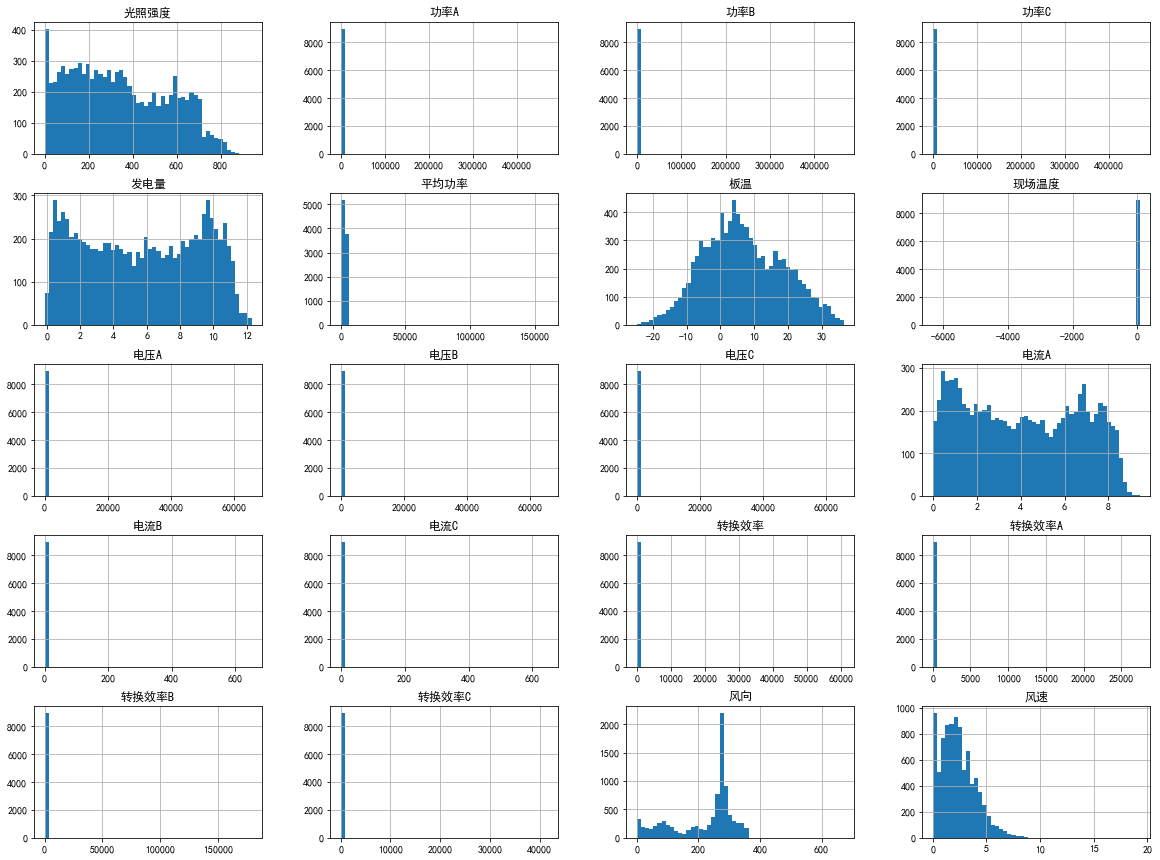

In [8]:
%matplotlib inline

train_data.hist(bins=50, figsize=(20,15))

问题3
<br>
观察数据集hist图像可以发现:
<br>
板温呈现正态分布
<br>
电流A分布与发电量分布相一致: 可能是重要特征
<br>
风速与风向之间可能存在相关关系
<br>
功率&nbsp;&nbsp; 电压 &nbsp;&nbsp; 电流 &nbsp;&nbsp; 转化效率 &nbsp;&nbsp;之间应该是存在某种关系